# Status of the Thalamus Corpus

This notebook compute and display some useful information about the status of the thalamus corpus.

In [1]:
## Installation of the Neuro Annotation Toolbox (NAT)
#!pip3 install -q --upgrade  git+https://github.com/BlueBrain/nat.git --user #--force-reinstall
    
## Installation of other standard toolboxes
#!pip3 install -q matplotlib seaborn #--user

In [2]:
## Downloading the Thalamus corpus
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

In [3]:
from glob import glob

from nat.annotation import Annotation
from nat.treeData import flatten_list

annotations = []
for fileName in glob(repo_dir + "/*.pcr"):
    try:
        annotations.extend(Annotation.readIn(open(fileName, "r", encoding="utf-8", errors='ignore')))
    except:       
        print("Skipping: ", fileName)    
        raise

In [4]:
import pandas as pd
import numpy as np

pd.DataFrame({"Nb. annotations" : [len(annotations)],
              "Nb. papers"      : [len(np.unique([annot.pubId for annot in annotations]))],
              "Nb. parameters"  : [len(flatten_list([[(param, annot) for param in annot.parameters]  
                                                     for annot in annotations]))]})

,Nb. annotations,Nb. papers,Nb. parameters
0,582,113,485


In [5]:
parameters = flatten_list([annot.parameters for annot in annotations])

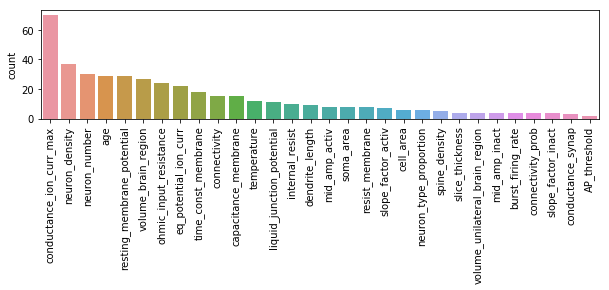

In [6]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from nat.modelingParameter import getParameterTypeNameFromID

plt.figure(figsize=(10, 2))

paramTypes = pd.Series([param.typeId for param in parameters])

axes = sb.countplot(paramTypes, orient='h',
                    order=paramTypes.value_counts().iloc[:30].index)

#plt.xticks(plt.xticks(), plt.gca().get_xticklabels(), rotation='vertical')
paramNames = [getParameterTypeNameFromID(typeId.get_text()) for typeId in axes.get_xticklabels()]
axes.set_xticklabels(paramNames, rotation='vertical')
pass

plt.savefig("annotatedParamHist.png", bbox_inches='tight', dpi=300)

### Printing information for the most annotated parameters

In [7]:
from nat.annotationSearch import ParameterSearch, ConditionAtom

parameters = flatten_list([annot.parameters for annot in annotations])        
paramTypes = pd.Series([param.typeId for param in parameters])
paramNames = [getParameterTypeNameFromID(typeId) for typeId in paramTypes.value_counts().iloc[:5].index]

for paramName in paramNames:
    print("PARAMETER NAME:", paramName)
    searcher = ParameterSearch(repo_dir)
    searcher.setSearchConditions(ConditionAtom("Parameter name", paramName))
    searcher.expandRequiredTags = True
    searcher.onlyCentralTendancy = False
    searcher.contextLength       = 200
    resultDF = searcher.search()
    no = 0
    for _, row in resultDF.iterrows():
        if row["obj_annotation"].type == "text":
            no += 1
            print("Number: ", no)
            print("Text: ", row["Text"].replace("\n", " "))
            print("Context: ", row["Context"].replace("\n", " "))
            print("Values: ", row["Values"])
            print("Unit: ", row["Unit"])
            print(" ")

PARAMETER NAME: conductance_ion_curr_max
Number:  1
Text:  e Na ϩ and K ϩ currents responsible for fast action poten- tials, they were inserted in the soma, and their kinetics were taken from a model of hippocampal pyramidal cells (Traub and Miles, 1991), assum- ing a resting potential of V T ϭ Ϫ52 mV in their equations, maximal conductances of g ៮ Na ϭ 100 mS/cm 2 and g ៮ K ϭ 100 mS/cm 2 , and reversal potentials of E Na ϭ 50 mV and E K ϭ Ϫ100 mV
Context:  t currents. Voltage-dependent conductances were modeled using a Hodgkin –Huxley type of kinetic model (Hodgkin and Huxley, 1952). Because no data exist to constrain the localization and kinetics of the Na ϩ and K ϩ currents responsible for fast action potentials, they were inserted in the soma, and their kinetics were taken from a model of hippocampal pyramidal cells (Traub and Miles, 1991), assuming a resting potential of VT ϭ Ϫ52 mV in their equations, maximal conductances of g៮ Na ϭ 100 mS/cm 2 and g៮ K ϭ 100 mS/cm 2, and reversa

Number:  1
Text:  The cellular density in Rt was 700 neurons/\nmmz in the rat
Context:  ar differences similar to those previously described [2,3,38]. The GABA/non-GABA ratio was close to 0.8 for both species (Fig. 5); the Rt/thalamus ratio was 10.12% in the rat and 10.31% in the mouse. The cellular density in Rt was 700 neurons/ mmz in the rat and 1087 neurons/mmz in the mouse, closer to that of the bat than to that of the rat (Figs. 6 and 7B ). Guinea Pig The main concentration of GABA-ir cells was found within Rt, where all the neurons of
Values:  700.0
Unit:  1/mm^2
 
Number:  2
Text:  As estimated with StereoInvestigator, the neuronal density was the highest in PF (51,465 +/- 3,577 neurons/mm^3 ), followed by DLG (40,069 +/- 1,540) and Rt (31,884 +/- 3,351; PF > DLG, P < 0.05; PF > Rt, P < 0.01).
Context:  and 0.76 Ϯ 0.11 mm3 (PF Ͻ DLG and Rt, P Ͻ 0.01). In cresyl violet-stained sections, the neuronal cell bodies in DLG, PF, and Rt were of comparable size and shape, averaging 15.8

Number:  1
Text:  No changes in the total number of nRt neurons were found (mean +/- SEM); GAERS = (30.5 +/- 2.4)*10^3 and controls = (31.7 +/- 2.0)*10^3
Context:  d using optical fractionator in the CAST-Grid system (Olympus, DK). The total number of neocortical neurons was then calculated using the formulae: Q- " E P '7" ap.int Ntotal m. Udisector  3. Results No changes in the total number of nRt neurons were found (mean + SEM); GAERS = (30.5 + 2.4)l 0 3 and controls = (31.7 +_ 2.0). l0 s (Fig. la).  The number of neocor~ica~ neurons in comro[animals was (19.5 + 0.9)- l0 ~' (mean + SEM). in the GAE~,~S a non-significam 6.5% reduction to {!8,2 _!: 0.4). ~0 ~ was tbund (Fig. ~b).  4. Conclu
Values:  31700.0 +/- 2000.0  (n=7.0)
Unit:  dimensionless
 
Number:  2
Text:  Control animals had 41 000 ± 1800 (range 32 800– 48 800) PARV-ir neurons in the RT.
Context:  ucleus as compared to that in controls (Fig. 3). Therefore, we performed an unbiased quantitative estimation of the PARV-ir neur

Number:  1
Text:  resting membrane potential: 262 6 2 mV apparent steady-state input resistance: 191 6 24 MV; n 5 10)
Context:  ing current-clamp recordings from adult rat dLGN slices (Fig. 8). The membrane properties of these neurons were similar to those described previously for TC neurons in identical recording conditions (resting membrane potential: 262 6 2 mV;  Parri and Crunelli • INa and INaP in Thalamic Neurons  apparent steady-state input resistance: 191 6 24 MV; n 5 10). The effect on tonic firing was investigated by recording from TC neurons held at membrane potentials more than or equal to 260 mV, from wher
Values:  -62.0 +/- 2.0  
Unit:  mV
 
Number:  2
Text:  The resting potential of interneurones (-52 + 1 mV, n = 24) was found to be significantly (P < 0 05, T= 9 09) more positive than that of TC neurones (-63 + 1 mV, n = 30).
Context:  onstant of interneurones (36-8 + 3-8 ms, n = 24), calculated by the fitting of a mono-exponential function to small (< 10 mV)  current r